In [1]:
import pickle
import pandas as pd
import numpy as np

In [47]:
with open('/g100_work/IscrC_mental/data/user_classification/user_age_gender_location_test_set.pkl', 'rb') as file:
    data_test = pickle.load(file)
    
with open('/g100_work/IscrC_mental/data/user_classification/user_age_gender_location_train_set.pkl', 'rb') as file:
    data_train = pickle.load(file)

In [48]:
## our data age

data = pd.concat([data_test, data_train], ignore_index = False)
data['year_born'] = 2023 - data['age_in_2023']
data = data[data['year_born'].isna()==False]

In [49]:
## our data age

generation_criteria = {
    'Greatest Generation': (1901, 1927),
    'Silent Generation': (1928, 1945),
    'Baby Boomers': (1946, 1964),
    'Generation X': (1965, 1980),
    'Millennials': (1981, 1996),
    'Generation Z': (1997, 2012),
    'Generation Alpha': (2013, 2025)
}

generation_counts = pd.DataFrame(columns=['Generation', 'Count'])


for generation, (start_year, end_year) in generation_criteria.items():
    count = data[(data['year_born'] >= start_year) & (data['year_born'] <= end_year)].shape[0]
    generation_counts = generation_counts.append({'Generation': generation, 'Count': count}, ignore_index=True)


/scratch_local/slurm_job.11305772/ipykernel_14381/62729688.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  generation_counts = generation_counts.append({'Generation': generation, 'Count': count}, ignore_index=True)
/scratch_local/slurm_job.11305772/ipykernel_14381/62729688.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  generation_counts = generation_counts.append({'Generation': generation, 'Count': count}, ignore_index=True)
/scratch_local/slurm_job.11305772/ipykernel_14381/62729688.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  generation_counts = generation_counts.append({'Generation': generation, 'Count': count}, ignore_index=True)
/scratch_local/slurm_job.11305772/ipykernel_14381/62729688.py:18: FutureW

In [50]:
## our data age
generation_counts['Share'] = (generation_counts['Count']/generation_counts['Count'].sum()*100).astype(float).round(0)
generation_counts = generation_counts[2:6]
other_category = pd.DataFrame({'Generation': ['Other'], 'Count': [0],'Share': [100 - generation_counts['Share'].sum()]})
generation_counts = pd.concat([generation_counts, other_category], ignore_index=True)

In [51]:
## statista age
Generation = ['Baby Boomers',  'Generation X','Millennials' ,'Generation Z', 'Other' ]
Share = [12,38,31,19,np.nan]
generation_counts_statista = pd.DataFrame({'Generation': Generation, 'Share': Share})

In [52]:
## our data gender
gender_counts = data['is_male'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count data']

gender_counts['Gender'] = ['Male', 'Female']
gender_counts['Share data']=(gender_counts['Count data']/gender_counts['Count data'].sum()*100)


In [53]:
gender_counts['Share data'] = gender_counts['Share data'].apply(lambda x: 63 if x >= 62 else 37)

In [54]:
gender_counts

,Gender,Count data,Share data
0,Male,11645,63
1,Female,6994,37


In [55]:
## book gender data

Geolocalized = ['Y','N', 'Total']
Male = [1040855, 5218975, 6259830]
Female = [505790, 2555489, 3061279]
Unknown = [505790, 2555489, 3061279]

gender_counts_statista = pd.DataFrame({'Geolocalized': Geolocalized, 'Male': Male, 'Female':Female, 'Unknown':Unknown})

In [56]:
gender_counts_statista

,Geolocalized,Male,Female,Unknown
0,Y,1040855,505790,505790
1,N,5218975,2555489,2555489
2,Total,6259830,3061279,3061279


In [57]:
## making i dataset for gender data
gender_counts['Count book'] = [gender_counts_statista['Male'][2],gender_counts_statista['Female'][2]]
gender_counts['Share book']=(gender_counts['Count book']/gender_counts['Count book'].sum()*100)


In [58]:
gender_counts['Share book'] = gender_counts['Share book'].apply(lambda x: 67 if x >= 65 else 33)

In [59]:
gender_counts.columns

Index(['Gender', 'Count data', 'Share data', 'Count book', 'Share book'], dtype='object')

In [60]:
gender_counts

,Gender,Count data,Share data,Count book,Share book
0,Male,11645,63,6259830,67
1,Female,6994,37,3061279,33


In [61]:
gender_counts['Share book'][0]

67

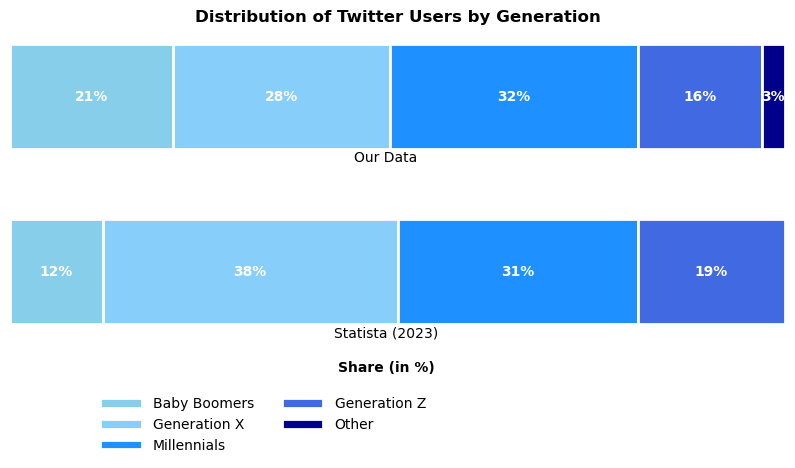

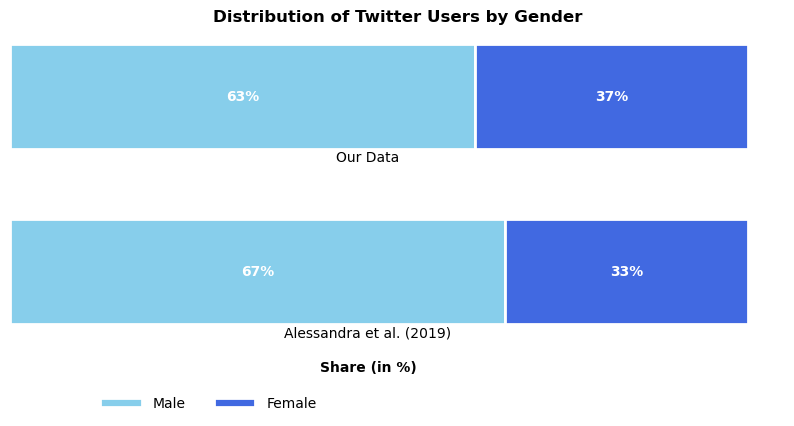

In [62]:
import matplotlib.pyplot as plt
import numpy as np

groups = ['Statista \n (2023)', 'Our Data']
generation_list = generation_counts['Generation'].tolist()
values = []

for i in generation_list:
    i_values = [
        generation_counts_statista[generation_counts_statista['Generation'] == i]['Share'].values[0],
        generation_counts[generation_counts['Generation'] == i]['Share'].values[0]
    ]
    values.append(i_values)

fig, ax = plt.subplots(figsize=(10, 4))

colors = ['#87CEEB', '#87CEFA', '#1E90FF', '#4169E1', '#00008B']

num_bars = len(groups)

for i in range(0, 5):
    bottom_values = [0, 0]
    for j in range(i):
        bottom_values = [x + y for x, y in zip(bottom_values, values[j])]
    bars = ax.barh(groups, values[i], left=bottom_values, label=generation_list[i], color=colors[i], edgecolor="white", linewidth=2, height=0.6)
    for bar in bars:
        width = bar.get_width() 
        label = f'{int(width):d}%' if not np.isnan(width) else ''  # Check for NaN values
        plt.text(
            bar.get_x() + width / 2,
            bar.get_y() + bar.get_height() / 2,
            label,
            ha='center',
            va='center',
            color='w',
            weight='bold',
            size=10
        )

plt.text(
    (( bars[-1].get_x())) / 2,
    0.65, 
    'Our Data',
    ha='center',
    va='center',
    color='black',
    size=10
)   

plt.text(
    (( bars[-1].get_x())) / 2,
    -0.35, 
    'Statista (2023)',
    ha='center',
    va='center',
    color='black',
    size=10
)  
  
    
plt.text(
    (( bars[-1].get_x())) / 2,
    -0.55, 
    'Share (in %)',
    ha='center',
    va='center',
    color='black',
    size=10,
    weight='bold' 
)  

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks([])
plt.yticks([])

ax.legend(generation_list[0:5], loc='upper left', bbox_to_anchor=(0.1, -0.15), ncol=2, handlelength=3, frameon=False)

plt.title('Distribution of Twitter Users by Generation', fontweight='bold')

plt.savefig('generation.eps')
plt.savefig('generation.png', bbox_inches='tight')

groups = ['Paper', 'Our dataset']
values_male =[ gender_counts['Share book'][0], gender_counts['Share data'][0]]
values_female =[gender_counts['Share book'][1], gender_counts['Share data'][1]]
values = [values_male,values_female ]



fig, ax = plt.subplots(figsize=(10, 4))

colors = [ '#87CEEB', '#4169E1']

ax.barh(groups, values_male, label='Male', color=colors[0], edgecolor="white", linewidth=2, height = 0.6)
ax.barh(groups, values_female, label='female',  left = values_male, color=colors[1], edgecolor="white", linewidth=2, height = 0.6)

for bar in ax.patches:
    label = f'{int(bar.get_width()):d}%' 
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        label,
        ha='center',
        va='center',
        color='w',
        weight='bold',
        size=10
    )

    
plt.text(
    (( bars[-1].get_x())) / 2,
    0.65, 
    'Our Data',
    ha='center',
    va='center',
    color='black',
    size=10
)   

plt.text(
    (( bars[-1].get_x())) / 2,
    -0.35, 
    'Alessandra et al. (2019)',
    ha='center',
    va='center',
    color='black',
    size=10
)  
  
    
plt.text(
    (( bars[-1].get_x())) / 2,
    -0.55, 
    'Share (in %)',
    ha='center',
    va='center',
    color='black',
    size=10,
    weight='bold' 
)      
    
    

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
    
plt.xticks([])
plt.yticks([])


ax.legend(['Male', 'Female'], loc='upper left', bbox_to_anchor=(0.1, -0.15), ncol=2, handlelength=3, frameon=False)


plt.title('Distribution of Twitter Users by Gender', fontweight='bold')


plt.savefig('gender.eps')
plt.savefig('gender.png', bbox_inches='tight')


plt.show()
plt.close()



In [12]:
#### y labels on the right 

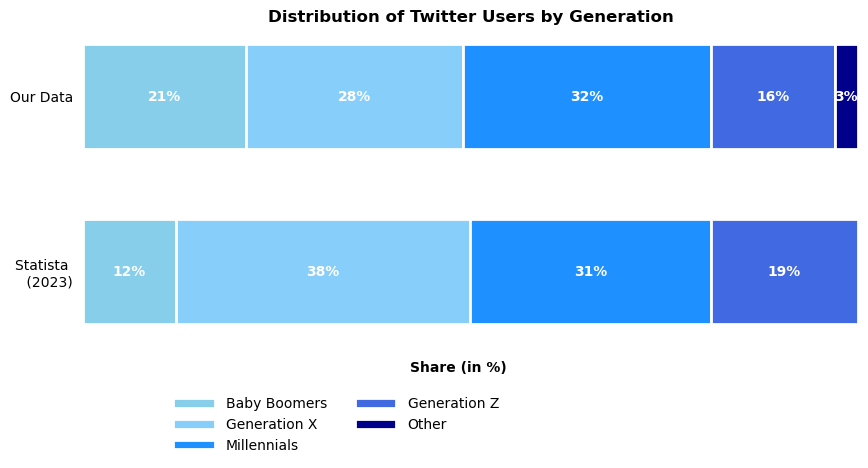

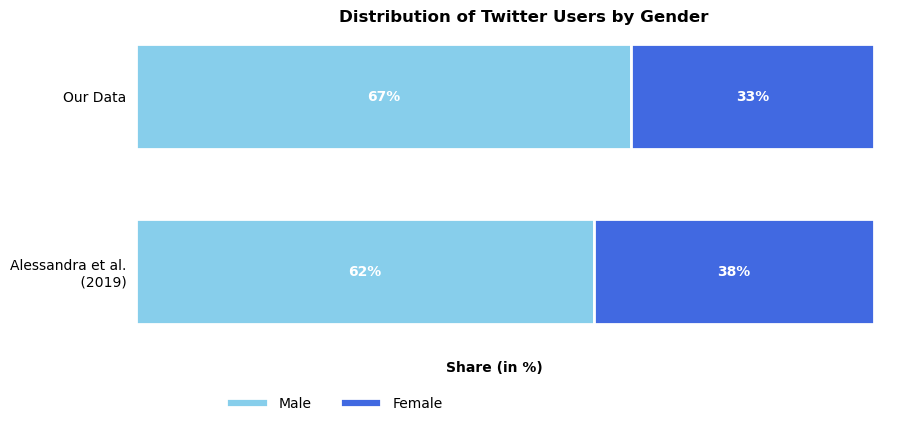

In [15]:
import matplotlib.pyplot as plt
import numpy as np

groups = ['Statista \n (2023)', 'Our Data']
generation_list = generation_counts['Generation'].tolist()
values = []

for i in generation_list:
    i_values = [
        generation_counts_statista[generation_counts_statista['Generation'] == i]['Share'].values[0],
        generation_counts[generation_counts['Generation'] == i]['Share'].values[0]
    ]
    values.append(i_values)

fig, ax = plt.subplots(figsize=(10, 4))

colors = ['#87CEEB', '#87CEFA', '#1E90FF', '#4169E1', '#00008B']

num_bars = len(groups)

for i in range(0, 5):
    bottom_values = [0, 0]
    for j in range(i):
        bottom_values = [x + y for x, y in zip(bottom_values, values[j])]
    bars = ax.barh(groups, values[i], left=bottom_values, label=generation_list[i], color=colors[i], edgecolor="white", linewidth=2, height=0.6)
    for bar in bars:
        width = bar.get_width() 
        label = f'{int(width):d}%' if not np.isnan(width) else ''  # Check for NaN values
        plt.text(
            bar.get_x() + width / 2,
            bar.get_y() + bar.get_height() / 2,
            label,
            ha='center',
            va='center',
            color='w',
            weight='bold',
            size=10
        )

  
    
plt.text(
    (( bars[-1].get_x())) / 2,
    -0.55, 
    'Share (in %)',
    ha='center',
    va='center',
    color='black',
    size=10,
    weight='bold' 
)  

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks([])
plt.tick_params(axis='y', which='both', left=False)

ax.legend(generation_list[0:5], loc='upper left', bbox_to_anchor=(0.1, -0.15), ncol=2, handlelength=3, frameon=False)

plt.title('Distribution of Twitter Users by Generation', fontweight='bold')

plt.savefig('generation.eps', bbox_inches='tight')

groups = ['Alessandra et al.\n (2019)', 'Our Data']
values_male =[gender_counts['Share data'][0], gender_counts['Share book'][0]]
values_female =[gender_counts['Share data'][1], gender_counts['Share book'][1]]
values = [values_male,values_female ]



fig, ax = plt.subplots(figsize=(10, 4))

colors = [ '#87CEEB', '#4169E1']

ax.barh(groups, values_male, label='Male', color=colors[0], edgecolor="white", linewidth=2, height = 0.6)
ax.barh(groups, values_female, label='female',  left = values_male, color=colors[1], edgecolor="white", linewidth=2, height = 0.6)

for bar in ax.patches:
    label = f'{int(bar.get_width()):d}%' 
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        label,
        ha='center',
        va='center',
        color='w',
        weight='bold',
        size=10
    )

    
  
    
plt.text(
    (( bars[-1].get_x())) / 2,
    -0.55, 
    'Share (in %)',
    ha='center',
    va='center',
    color='black',
    size=10,
    weight='bold' 
)      
    
    

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
    
plt.xticks([])
plt.tick_params(axis='y', which='both', left=False)


ax.legend(['Male', 'Female'], loc='upper left', bbox_to_anchor=(0.1, -0.15), ncol=2, handlelength=3, frameon=False)


plt.title('Distribution of Twitter Users by Gender', fontweight='bold')


plt.savefig('gender.eps', bbox_inches='tight')


plt.show()
plt.close()